#Clustering w/ AHC

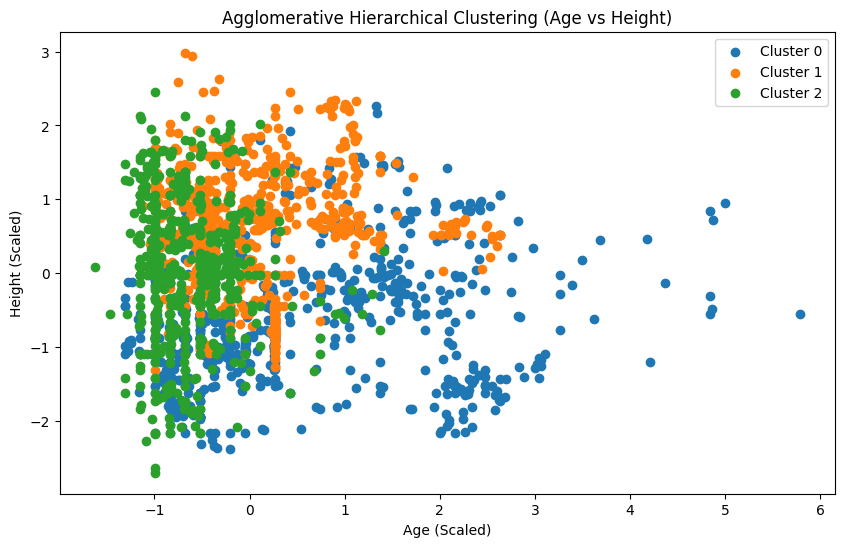

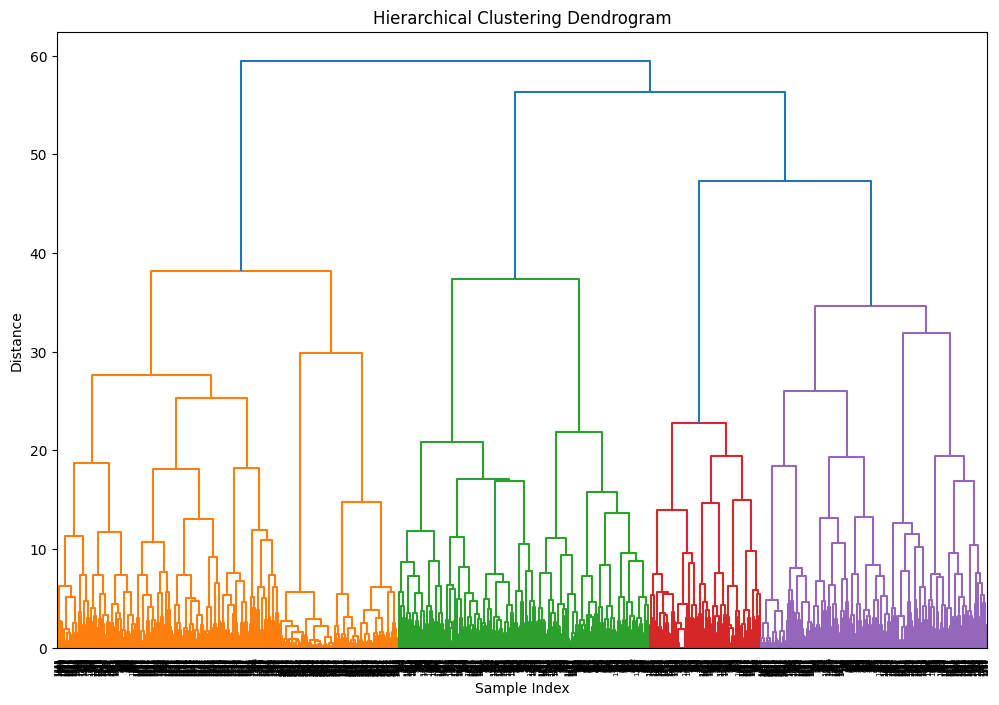

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.read_csv('ObesityDataSet.csv')

features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

achc = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = achc.fit_predict(X_scaled)

data['Cluster'] = labels

plt.figure(figsize=(10, 6))
for cluster in np.unique(labels):
    cluster_data = X_scaled[labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('Agglomerative Hierarchical Clustering (Age vs Height)')
plt.xlabel('Age (Scaled)')
plt.ylabel('Height (Scaled)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()